# Okavango_Scenario

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import matplotlib.patches as patches
from matplotlib.dates import date2num
import matplotlib.dates as mdates
from hydroeval import evaluator, nse, rmse, pbias
from pyemu.pst.pst_utils import SFMT,IFMT,FFMT

flopy is installed in C:\Users\seonggyu.park\Miniconda3\envs\sm_pest\lib\site-packages\flopy


# Set Path

In [2]:
sys.path.insert(0, 'D:/spark-brc_gits/swatmf_git/swatmf_pkgs')
import swatmf_viz

In [3]:
import swatmf_viz
import itertools

In [4]:
wd = "D:\\Projects\\Watersheds\\Okavango\\scenarios\\okvg_swatmf_scn_climates\\scn_models"
sub_number = 240
start_date = '1/1/2020'
obd_nam = '240'

# Streamflow

In [ ]:
scn_df = swatmf_viz.all_strs(wd, sub_number, start_date, obd_nam, time_step='M')

In [6]:
wd_base = "D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_calibrated_base"
# Create data with parameter change
df_rch = pd.read_csv(
                    os.path.join(wd_base, "output.rch"),
                    delim_whitespace=True,
                    skiprows=9,
                    usecols=[1, 3, 6],
                    names=["date", "filter", "streamflow_sim"],
                    index_col=0)

df = df_rch.loc[sub_number]
df = df[df["filter"] < 13]
df.index = pd.date_range('1/1/2003', periods=len(df.streamflow_sim), freq="M")
df.rename(columns = {'streamflow_sim':'base_{}'.format(sub_number)}, inplace = True)
base_df = df.drop('filter', axis=1)
cbase_df = base_df['1/1/2019':'12/31/2019']

In [7]:
scn_df

,base_ssp245-fgoals-g3_sub_240,base_ssp245-inm-cm5-0_sub_240,base_ssp245-miroc6_sub_240,base_ssp245-noresm2-lm_sub_240,base_ssp245-ukesm1-0-ll_sub_240,base_ssp585-fgoals-g3_sub_240,base_ssp585-inm-cm5-0_sub_240,base_ssp585-miroc6_sub_240,base_ssp585-noresm2-lm_sub_240,base_ssp585-ukesm1-0-ll_sub_240,...,rd_ssp245-fgoals-g3_sub_240,rd_ssp245-inm-cm5-0_sub_240,rd_ssp245-miroc6_sub_240,rd_ssp245-noresm2-lm_sub_240,rd_ssp245-ukesm1-0-ll_sub_240,rd_ssp585-fgoals-g3_sub_240,rd_ssp585-inm-cm5-0_sub_240,rd_ssp585-miroc6_sub_240,rd_ssp585-noresm2-lm_sub_240,rd_ssp585-ukesm1-0-ll_sub_240
2020-01-31,162.70,224.60,175.70,157.40,183.10,163.80,163.10,180.20,146.80,220.20,...,160.90,220.30,174.20,155.00,180.40,162.00,160.00,177.90,142.60,215.50
2020-02-29,269.50,356.80,309.10,312.30,358.10,286.90,243.60,395.90,332.20,338.40,...,266.40,354.50,307.70,314.50,356.30,286.90,243.70,393.70,331.80,333.60
2020-03-31,668.90,394.50,442.80,405.70,393.90,402.40,565.10,526.70,677.50,292.50,...,666.70,393.50,439.90,405.90,394.20,402.40,567.70,522.60,677.80,287.10
2020-04-30,435.90,415.60,398.10,391.80,313.10,376.70,489.10,314.30,382.80,390.70,...,434.60,414.80,397.50,390.30,307.50,373.90,487.50,309.50,381.00,390.80
2020-05-31,261.60,342.10,392.90,254.60,151.50,248.90,347.10,254.30,211.70,306.70,...,256.10,336.70,391.60,247.90,147.10,243.70,342.90,247.80,205.10,301.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050-08-31,81.96,106.60,96.39,108.90,82.24,81.88,117.50,84.60,91.79,96.28,...,75.56,102.40,89.27,101.70,75.68,75.46,114.10,77.78,84.72,89.06
2050-09-30,48.82,73.90,67.66,79.32,46.11,37.75,93.95,50.33,62.78,61.55,...,45.83,68.02,63.09,72.69,44.50,36.64,86.91,48.73,58.92,57.46
2050-10-31,35.26,46.36,76.94,60.81,33.58,44.55,87.18,27.59,51.89,27.78,...,35.20,45.65,68.58,55.41,31.83,40.36,79.74,27.60,47.72,27.68
2050-11-30,80.96,81.52,74.73,91.61,61.61,85.59,97.29,74.84,109.90,71.60,...,69.30,71.00,68.26,83.09,54.47,73.97,89.32,65.01,99.98,59.65


In [8]:
scn_df = scn_df.iloc[:, :10]

In [9]:
scn_df

,base_ssp245-fgoals-g3_sub_240,base_ssp245-inm-cm5-0_sub_240,base_ssp245-miroc6_sub_240,base_ssp245-noresm2-lm_sub_240,base_ssp245-ukesm1-0-ll_sub_240,base_ssp585-fgoals-g3_sub_240,base_ssp585-inm-cm5-0_sub_240,base_ssp585-miroc6_sub_240,base_ssp585-noresm2-lm_sub_240,base_ssp585-ukesm1-0-ll_sub_240
2020-01-31,162.70,224.60,175.70,157.40,183.10,163.80,163.10,180.20,146.80,220.20
2020-02-29,269.50,356.80,309.10,312.30,358.10,286.90,243.60,395.90,332.20,338.40
2020-03-31,668.90,394.50,442.80,405.70,393.90,402.40,565.10,526.70,677.50,292.50
2020-04-30,435.90,415.60,398.10,391.80,313.10,376.70,489.10,314.30,382.80,390.70
2020-05-31,261.60,342.10,392.90,254.60,151.50,248.90,347.10,254.30,211.70,306.70
...,...,...,...,...,...,...,...,...,...,...
2050-08-31,81.96,106.60,96.39,108.90,82.24,81.88,117.50,84.60,91.79,96.28
2050-09-30,48.82,73.90,67.66,79.32,46.11,37.75,93.95,50.33,62.78,61.55
2050-10-31,35.26,46.36,76.94,60.81,33.58,44.55,87.18,27.59,51.89,27.78
2050-11-30,80.96,81.52,74.73,91.61,61.61,85.59,97.29,74.84,109.90,71.60


In [10]:
s245_min = scn_df.iloc[:, :5].min(axis = 1)
s245_max = scn_df.iloc[:, :5].max(axis = 1)
s585_min = scn_df.iloc[:, 5:].min(axis = 1)
s585_max = scn_df.iloc[:, 5:].max(axis = 1)


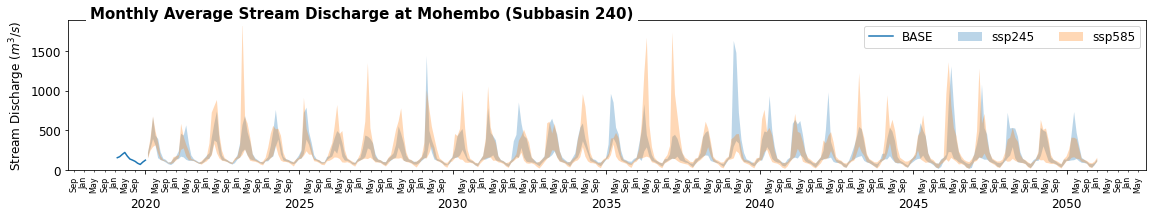

In [11]:
f, ax = plt.subplots(figsize=(16, 3))
# marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',))
# for i in range(len(scn_df.columns)):
#     ax.plot(scn_df.index, scn_df.iloc[:, i], marker = next(marker), label=scn_df.columns[i])
ax.fill_between(scn_df.index, s245_min, s245_max, alpha=0.3, label='ssp245')
ax.fill_between(scn_df.index, s585_min, s585_max, alpha=0.3, label='ssp585')
ax.plot(cbase_df.index, cbase_df, label='BASE')
ax.tick_params(axis='both', labelsize=12)
lines, labels = f.axes[0].get_legend_handles_labels()


years = mdates.YearLocator(5)
months = mdates.MonthLocator(interval=4)
monthsFmt = mdates.DateFormatter('%b') 
yearsFmt = mdates.DateFormatter('%Y')

# ax.xaxis.set_ticks_position('top')
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), fontsize=8, rotation=90)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.tick_params(axis='x', pad=23) # add some space for the year label


ax.legend(
    lines, labels, ncol=3,
    # bbox_to_anchor=(0, 0.202),
    fontsize=12,
    # loc = 'lower left'
    )
ax.margins(y=0.01)
ax.set_title(
    'Monthly Average Stream Discharge at Mohembo (Subbasin 240)',
    fontsize=15,
    fontweight="bold",
    horizontalalignment='left',
    x=0.02,
    y=0.97,
    bbox=dict(
        facecolor='white',
        edgecolor='white'))
ax.set_ylabel(r'Stream Discharge $(m^3/s)$', fontsize = 12)
f.tight_layout()
plt.savefig(os.path.join(wd, 'projected_str_mohembo.png'), dpi=300, bbox_inches="tight")
plt.show()

# Get monthly group

In [12]:
tot_df = pd.concat([base_df, scn_df], axis=1)

In [13]:
tot_df.columns


Index(['base_240', 'base_ssp245-fgoals-g3_sub_240',
       'base_ssp245-inm-cm5-0_sub_240', 'base_ssp245-miroc6_sub_240',
       'base_ssp245-noresm2-lm_sub_240', 'base_ssp245-ukesm1-0-ll_sub_240',
       'base_ssp585-fgoals-g3_sub_240', 'base_ssp585-inm-cm5-0_sub_240',
       'base_ssp585-miroc6_sub_240', 'base_ssp585-noresm2-lm_sub_240',
       'base_ssp585-ukesm1-0-ll_sub_240'],
      dtype='object')

In [14]:
xlabels = ['BASE']+[x[5:-8] for x in tot_df.columns[1:]]
xlabels

['BASE',
 'ssp245-fgoals-g3',
 'ssp245-inm-cm5-0',
 'ssp245-miroc6',
 'ssp245-noresm2-lm',
 'ssp245-ukesm1-0-ll',
 'ssp585-fgoals-g3',
 'ssp585-inm-cm5-0',
 'ssp585-miroc6',
 'ssp585-noresm2-lm',
 'ssp585-ukesm1-0-ll']

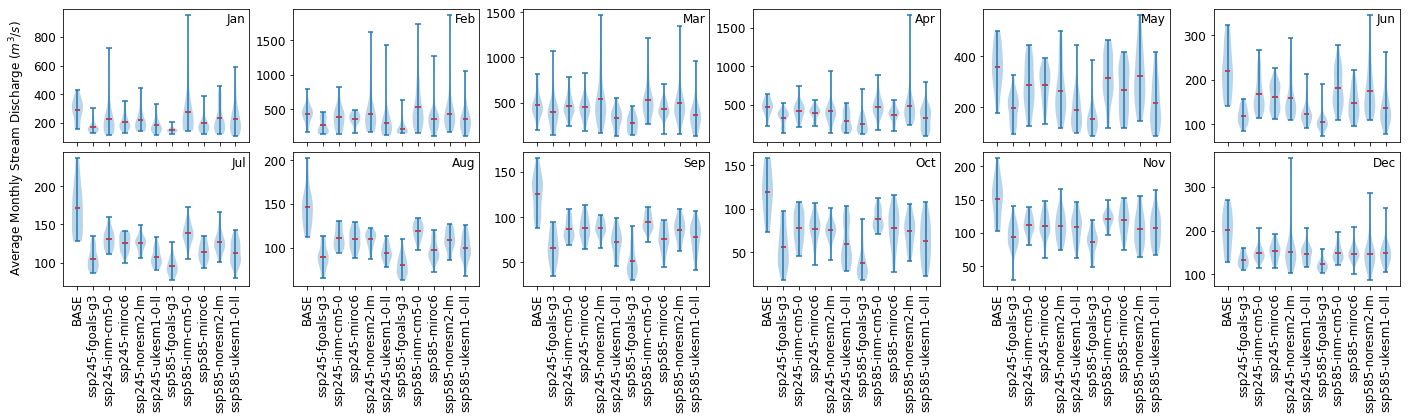

In [19]:
# Boxplot
f, axes = plt.subplots(2, 6, figsize=(20,6), sharex=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']


# plot. Set color of marker edge
flierprops = dict(
                marker='o', markerfacecolor='#1f77b4', markersize=7,
                # linestyle='None',
                # markeredgecolor='none',
                alpha=0.3)
for i, ax in enumerate(axes.flat):
    df_m = tot_df.loc[tot_df.index.month==i+1]
    data = [df_m[i].dropna() for i in df_m.columns]
    # df_m = df_m.dropna(ax)
    
    # ax.boxplot(data, flierprops=flierprops)
    r = ax.violinplot(
        data,  widths=0.7, showmeans=True, showextrema=True,
        # bw_method='silverman'
        )
    r['cmeans'].set_color('r')

    
    # ax.boxplot(df_m.values, flierprops=flierprops)
    ax.set_xticks([i+1 for i in range(11)])
    # ax.set_xticklabels(df_m.keys(), rotation=90)
    ax.set_xticklabels(xlabels, rotation=90)
    # ax.set_xticks(df_m.columns[::1])
    ax.set_title(
        month_names[i],
        horizontalalignment='right',
        x=0.98,
        y=0.85,
        fontsize=12
    )
    ax.tick_params(axis='both', labelsize=12)
ax1.set_ylabel('Average Monthly Stream Discharge $(m^3/s)$', fontsize=12, labelpad=20)
plt.tight_layout()
plt.savefig(os.path.join(wd, 'projected_viloin_mstr.png'), dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
wd

# Sediment

In [ ]:
scn_df = swatmf_viz.all_seds(wd, sub_number, start_date, obd_nam, time_step='M')

In [21]:
wd_base = "D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_calibrated_base"
# Create data with parameter change
df_rch = pd.read_csv(
                    os.path.join(wd_base, "output.rch"),
                    delim_whitespace=True,
                    skiprows=9,
                    usecols=[1, 3, 10],
                    names=["date", "filter", "streamflow_sim"],
                    index_col=0)

df = df_rch.loc[sub_number]
df = df[df["filter"] < 13]
df.index = pd.date_range('1/1/2003', periods=len(df.streamflow_sim), freq="M")
df.rename(columns = {'streamflow_sim':'base_{}'.format(sub_number)}, inplace = True)
base_df = df.drop('filter', axis=1)
cbase_df = base_df['1/1/2019':'12/31/2019']

In [22]:
scn_df = scn_df.iloc[:, :10]
s245_min = scn_df.iloc[:, :5].min(axis = 1)
s245_max = scn_df.iloc[:, :5].max(axis = 1)
s585_min = scn_df.iloc[:, 5:].min(axis = 1)
s585_max = scn_df.iloc[:, 5:].max(axis = 1)

In [23]:
scn_df

,base_ssp245-fgoals-g3_sub_240,base_ssp245-inm-cm5-0_sub_240,base_ssp245-miroc6_sub_240,base_ssp245-noresm2-lm_sub_240,base_ssp245-ukesm1-0-ll_sub_240,base_ssp585-fgoals-g3_sub_240,base_ssp585-inm-cm5-0_sub_240,base_ssp585-miroc6_sub_240,base_ssp585-noresm2-lm_sub_240,base_ssp585-ukesm1-0-ll_sub_240
2020-01-31,43300.0,71240.0,49040.0,41110.0,54240.0,43940.0,43910.0,50460.0,38560.0,70040.0
2020-02-29,99900.0,124700.0,129500.0,119000.0,138500.0,103300.0,77100.0,177200.0,127100.0,116200.0
2020-03-31,327900.0,178000.0,203900.0,204800.0,187700.0,205000.0,297300.0,245400.0,349600.0,100000.0
2020-04-30,205800.0,201800.0,179000.0,180800.0,117900.0,157000.0,248100.0,106400.0,172200.0,161500.0
2020-05-31,87540.0,143500.0,187200.0,85000.0,39790.0,80710.0,148600.0,82960.0,65210.0,113300.0
...,...,...,...,...,...,...,...,...,...,...
2050-08-31,19320.0,25790.0,23110.0,26170.0,19240.0,19330.0,28080.0,20020.0,21630.0,22810.0
2050-09-30,12640.0,16540.0,15530.0,17610.0,12140.0,14380.0,20910.0,12820.0,14400.0,14300.0
2050-10-31,13100.0,12210.0,18020.0,13980.0,14000.0,17020.0,20090.0,18410.0,13370.0,18600.0
2050-11-30,18980.0,18610.0,17030.0,20980.0,17450.0,19690.0,22040.0,18310.0,26280.0,19550.0


In [27]:
from matplotlib.ticker import FuncFormatter
from swatmf_pkgs.swatmf_viz import y_fmt

ModuleNotFoundError: No module named 'swatmf_pkgs'

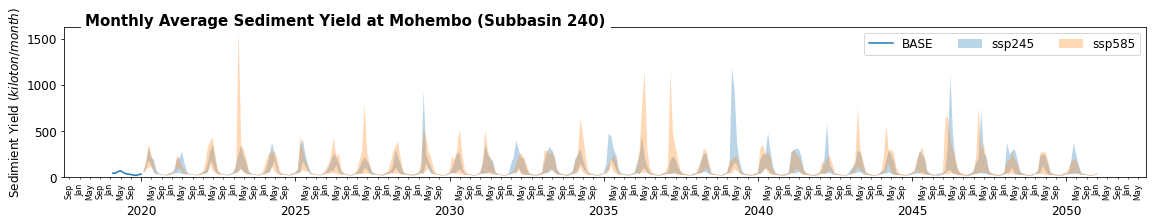

In [24]:
f, ax = plt.subplots(figsize=(16, 3))
# marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',))
# for i in range(len(scn_df.columns)):
#     ax.plot(scn_df.index, scn_df.iloc[:, i], marker = next(marker), label=scn_df.columns[i])
ax.fill_between(scn_df.index, s245_min/(1e3), s245_max/(1e3), alpha=0.3, label='ssp245')
ax.fill_between(scn_df.index, s585_min/(1e3), s585_max/(1e3), alpha=0.3, label='ssp585')
ax.plot(cbase_df.index, cbase_df/(1e3), label='BASE')
ax.tick_params(axis='both', labelsize=12)
lines, labels = f.axes[0].get_legend_handles_labels()


years = mdates.YearLocator(5)
months = mdates.MonthLocator(interval=4)
monthsFmt = mdates.DateFormatter('%b') 
yearsFmt = mdates.DateFormatter('%Y')

# ax.xaxis.set_ticks_position('top')
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), fontsize=8, rotation=90)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.tick_params(axis='x', pad=23) # add some space for the year label

# ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))
ax.legend(
    lines, labels, ncol=3,
    # bbox_to_anchor=(0, 0.202),
    fontsize=12,
    # loc = 'lower left'
    )
ax.margins(y=0.01)
ax.set_title(
    'Monthly Average Sediment Yield at Mohembo (Subbasin 240)',
    fontsize=15,
    fontweight="bold",
    horizontalalignment='left',
    x=0.02,
    y=0.97,
    bbox=dict(
        facecolor='white',
        edgecolor='white'))
ax.set_ylabel(r'Sedimient Yield $(kiloton/month)$', fontsize = 12)
f.tight_layout()
plt.savefig(os.path.join(wd, 'projected_sed_mohembo.png'), dpi=300, bbox_inches="tight")
plt.show()

In [25]:
tot_df = pd.concat([base_df, scn_df], axis=1)
xlabels = ['BASE']+[x[5:-8] for x in tot_df.columns[1:]]
xlabels

['BASE',
 'ssp245-fgoals-g3',
 'ssp245-inm-cm5-0',
 'ssp245-miroc6',
 'ssp245-noresm2-lm',
 'ssp245-ukesm1-0-ll',
 'ssp585-fgoals-g3',
 'ssp585-inm-cm5-0',
 'ssp585-miroc6',
 'ssp585-noresm2-lm',
 'ssp585-ukesm1-0-ll']

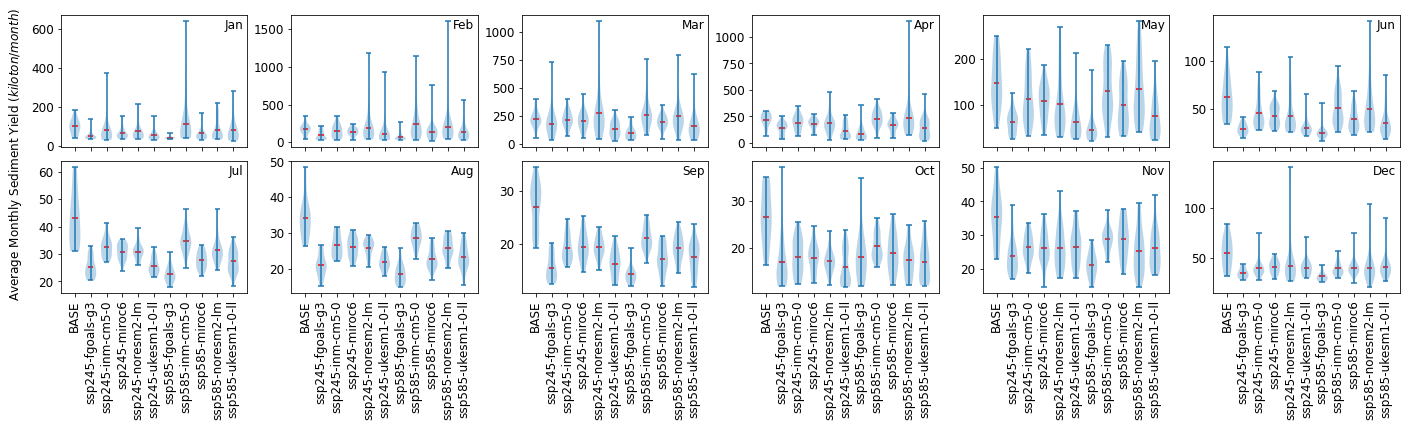

In [27]:
# Boxplot
f, axes = plt.subplots(2, 6, figsize=(20,6), sharex=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']


# plot. Set color of marker edge
flierprops = dict(
                marker='o', markerfacecolor='#1f77b4', markersize=7,
                # linestyle='None',
                # markeredgecolor='none',
                alpha=0.3)
for i, ax in enumerate(axes.flat):
    df_m = tot_df.loc[tot_df.index.month==i+1]
    data = [df_m[i].dropna()/(1e3) for i in df_m.columns]
    # df_m = df_m.dropna(ax)
    
    # ax.boxplot(data, flierprops=flierprops)
    
    r = ax.violinplot(
        data,  widths=0.7, showmeans=True, showextrema=True,
        # bw_method='silverman'
        )
    r['cmeans'].set_color('r')

    # ax.boxplot(df_m.values, flierprops=flierprops)
    ax.set_xticks([i+1 for i in range(11)])
    # ax.set_xticklabels(df_m.keys(), rotation=90)
    ax.set_xticklabels(xlabels, rotation=90)
    # ax.set_xticks(df_m.columns[::1])
    ax.set_title(
        month_names[i],
        horizontalalignment='right',
        x=0.98,
        y=0.85,
        fontsize=12
    )
    ax.tick_params(axis='both', labelsize=12)
ax1.set_ylabel('Average Monthly Sediment Yield $(kiloton/month)$', fontsize=12, labelpad=20)
plt.tight_layout()
plt.savefig(os.path.join(wd, 'projected_violin_msed.png'), dpi=300, bbox_inches="tight")
plt.show()